In [3]:
#!usr/bin/env python3
#! -*- coding: utf-8 -*-
#xiaobaodas version_alpha_07 2017-03-03 13:52:12
import sys
import pandas as pd
import datetime
import pymysql
from dateutil.parser import parse
def xiaobaods_a01(date="",category="牛仔裤",length=7,SQL="xiaobaods",table="bc_attribute_granularity_sales",variable="热销排名",debug=0):
    SQL_msg = {"local":{"host":"127.0.0.1","port":3306,"user":"root","charset":"utf8","passwd":"","db":"baoersqlbasic"},"xiaobaods":{"host":"101.201.237.58","port":3306,"user":"program_default","charset":"utf8","passwd":"KQPp5wwZJG33fwFs","db":"baoersqlbasic"}}
    latest_date=datetime.datetime.today().date()-datetime.timedelta(1)
    if category not in ["牛仔裤","打底裤","休闲裤"]:
        category="牛仔裤"
    if length>14 or length<3:
        length=7
    if table not in ["bc_attribute_granularity_sales","bc_attribute_granularity_visitor"]:
        table="bc_attribute_granularity_sales"
    if date=="":
        date = latest_date
    else:
        date=parse(date).date()  # 修改日期格式
    if variable not in ["热销排名","支付子订单数","支付转化率指数"]:
        variable="热销排名"
    # Try to connect with the mysql and back a date which minimum.
    try:
        conn = pymysql.connect(host=SQL_msg[SQL]["host"], port=SQL_msg[SQL]["port"], user=SQL_msg[SQL]["user"], passwd=SQL_msg[SQL]["passwd"], charset=SQL_msg[SQL]["charset"], db=SQL_msg[SQL]["db"])
        cursor = conn.cursor()
        cursor.execute("SELECT min(`日期`),max(`日期`) from "+table+" where `类目`='"+category+"';")
        date_limit = cursor.fetchall()
        date_floor = date_limit[0][0]
        date_ceiling = date_limit[0][1]
        cursor.close()
        conn.close()
    except Exception as e:
        return
    if date > latest_date:
        date = latest_date
    if date > date_ceiling:
        date = date_ceiling
    if date < date_floor + datetime.timedelta(length-1):
        date = date_floor + datetime.timedelta(length-1)
    # Main program.
    sql_select_f = "SELECT CT.`主图缩略图`,CT.`热销排名`,CT.`商品信息`,CT.`所属店铺`,CT.`支付子订单数`,CT.`交易增长幅度`,CT.`支付转化率指数`,CT.`宝贝链接`,CT.`店铺链接`"
    sql_select_m=""
    for i in range(length):
        sql_select_m += ",MAX(CASE ST.日期 WHEN "+str(date - datetime.timedelta(length-i-1)).replace("-","")+" THEN ST."+variable+" ELSE NULL END) AS `日期："+str(date - datetime.timedelta(length-i-1)).replace("-","")+"` "
    sql_select_e="FROM "+table+" AS CT LEFT JOIN "+table+" AS ST ON SUBSTRING(CT.`宝贝链接` ,- 12) = SUBSTRING(ST.`宝贝链接` ,- 12) WHERE CT.`日期` = "+str(date).replace("-","")+" AND CT.类目 = '"+category+"' AND ST.日期 >= "+str(date - datetime.timedelta(length)).replace("-","")+" AND ST.类目 = '"+category+"' GROUP BY CT.`"+variable+"` ORDER BY CT.`热销排名`;"
    # read msg from Mysql
    conn = pymysql.connect(host=SQL_msg[SQL]["host"], port=SQL_msg[SQL]["port"], user=SQL_msg[SQL]["user"], passwd=SQL_msg[SQL]["passwd"], charset=SQL_msg[SQL]["charset"], db=SQL_msg[SQL]["db"])
    df = pd.io.sql.read_sql_query(sql_select_f+sql_select_m+sql_select_e,conn)
    cursor.close()
    conn.close()
    df = df.fillna("")
    if debug == 0:
        print(df.to_json(orient="index"))
    elif debug== 8:
        return df
    elif debug== 2:
        print("date=",date," category=",category," length=",length," SQL=",SQL," variable=",variable,"debug=",debug)
    elif debug== 1:
        print( "  SQL_choice: ",SQL,"  category: ",category,"  length: ",str(length),"  date: ",str(date),"  SQL: ",sql_select_f,sql_select_m,sql_select_e)
if __name__ == "__main__":
    try:
        argv = sys.argv[1]
        argv = eval(argv)
    except:
        argv ={}
# xiaobaods_a01(date=argv.get("date",""),category=argv.get("category","牛仔裤"),length=argv.get("length",7),SQL=argv.get("SQL","xiaobaods"),table=argv.get("table","bc_attribute_granularity_sales"),variable=argv.get("variable","热销排名"),debug=argv.get("debug",0))

In [7]:
xiaobaods_a01(date=argv.get("date",""),category=argv.get("category","休闲裤"),length=argv.get("length",7),SQL=argv.get("SQL","xiaobaods"),table=argv.get("table","bc_attribute_granularity_visitor"),variable=argv.get("variable","热销排名"),debug=argv.get("debug",8))

DatabaseError: Execution failed on sql 'SELECT CT.`主图缩略图`,CT.`热销排名`,CT.`商品信息`,CT.`所属店铺`,CT.`支付子订单数`,CT.`交易增长幅度`,CT.`支付转化率指数`,CT.`宝贝链接`,CT.`店铺链接`,MAX(CASE ST.日期 WHEN 20170307 THEN ST.热销排名 ELSE NULL END) AS `日期：20170307` ,MAX(CASE ST.日期 WHEN 20170308 THEN ST.热销排名 ELSE NULL END) AS `日期：20170308` ,MAX(CASE ST.日期 WHEN 20170309 THEN ST.热销排名 ELSE NULL END) AS `日期：20170309` ,MAX(CASE ST.日期 WHEN 20170310 THEN ST.热销排名 ELSE NULL END) AS `日期：20170310` ,MAX(CASE ST.日期 WHEN 20170311 THEN ST.热销排名 ELSE NULL END) AS `日期：20170311` ,MAX(CASE ST.日期 WHEN 20170312 THEN ST.热销排名 ELSE NULL END) AS `日期：20170312` ,MAX(CASE ST.日期 WHEN 20170313 THEN ST.热销排名 ELSE NULL END) AS `日期：20170313` FROM bc_attribute_granularity_visitor AS CT LEFT JOIN bc_attribute_granularity_visitor AS ST ON SUBSTRING(CT.`宝贝链接` ,- 12) = SUBSTRING(ST.`宝贝链接` ,- 12) WHERE CT.`日期` = 20170313 AND CT.类目 = '休闲裤' AND ST.日期 >= 20170306 AND ST.类目 = '休闲裤' GROUP BY CT.`热销排名` ORDER BY CT.`热销排名`;': (1054, "Unknown column 'CT.交易增长幅度' in 'field list'")

In [6]:
df = xiaobaods_a01(category='打底裤',debug=8)

In [7]:
df.to_csv(r"C:\Users\Administrator\Desktop\打底裤Top500_170313.csv")

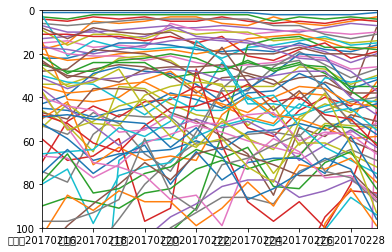

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(100):
    try:
        df.ix[i,9:].plot(ylim=(100,0))
    except Exception as e:
        pass

In [48]:
argv = sys.argv[1]

In [49]:
argv

'-f'